# Ripserer: Julia

In this notebook we will explore some of the feature of ripserer.jl in both 2d and 3d


In [1]:
using LinearAlgebra
using Plots
using Ripserer
using CSV
using DataFrames
using DelimitedFiles

Here are two function to generate an annulus and a 3d annulus

In [2]:
function annulus(n, r1=1, r2=2, offset=(0, 0))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end


function annulus3d(n, r1=1, r2=2, offset=(0, 0, 0))
    result = Tuple{Float64,Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(3) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2], point[3] + offset[3]))
        end
    end
    return result
end

annulus3d (generic function with 4 methods)

## Two dimensional Euclidean Space

In [3]:
data = annulus(300)

300-element Vector{Tuple{Float64, Float64}}:
 (0.6449908505390081, 1.513931572548639)
 (1.8373739041280155, 0.5051390121712691)
 (-0.8536072165012119, -0.8240581728187895)
 (0.7061678349573626, -1.2694645233204236)
 (-1.9199649025317305, -0.3253822736232941)
 (0.23871129669571634, -1.7447993475348769)
 (-0.4082389180078092, -1.0529337260124807)
 (-1.0097287486247382, -1.3140428571837548)
 (-1.0130280918445935, 0.3425546219227158)
 (1.0232872785473814, 1.066964531981914)
 (-0.8319297306735676, -1.2068799602261588)
 (-1.4246703282815094, 1.1512997940977732)
 (-1.7777045563982252, 0.7375421071913104)
 ⋮
 (-1.113538954779715, 1.0725285867269898)
 (-1.323912434497693, -0.6870600668183293)
 (1.8892708579706605, 0.2829844911371415)
 (-0.318573476566578, 1.9028441740362236)
 (1.5130369846206957, 1.168567294986298)
 (1.3409994868620636, -0.6983434453798436)
 (1.6125607342107315, -0.5815308746633363)
 (0.8728356358151634, -1.7989024177382786)
 (0.943137227228612, -1.3556777257554593)
 (-1.317055

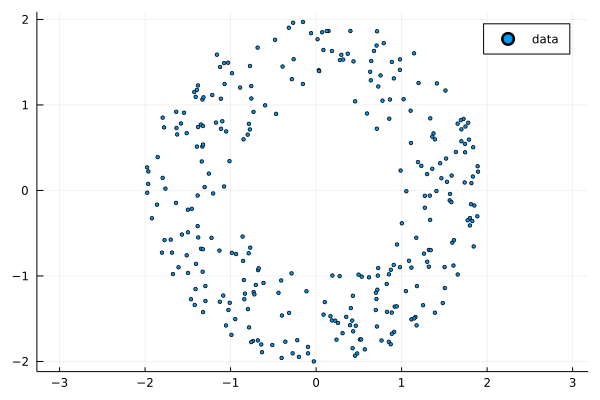

In [4]:
scatter(data; label="data", markersize=2, aspect_ratio=1)

Compute Barcodes and plot them

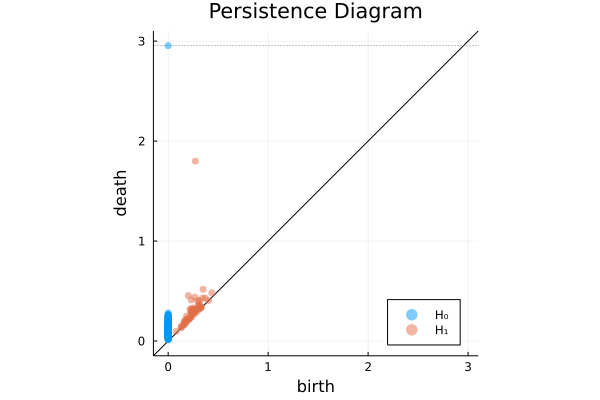

In [5]:
diagram = ripserer(data, modulus=11, dim_max=1)
plot(diagram)

This is a little funky here. Julia does 1 indexing so `diagram[2]` is accessing the $H_1$ barcodes. They are sorted from shortest inteval to longest. So the last element is the "biggest" hole

In [6]:
most_persistent = diagram[2][end]

[0.273, 1.8) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}

We can also access the birth and death simplices. These are the simplices that cause the birth and the death of the hole in question. The following is the output for the death simplex, which is a 2-simplex

In [7]:
death_sx = death_simplex(most_persistent)

2-dimensional Simplex(index=114353, birth=1.7992591013526762):
  +(90, 41, 9)

We can then find the points corresponding to the simplex

In [8]:
data[death_sx]

3-element StaticArrays.SizedVector{3, Tuple{Float64, Float64}, Vector{Tuple{Float64, Float64}}} with indices SOneTo(3):
 (0.19042409189169796, -0.9949939399100094)
 (0.7108733494316697, 0.7222877509867383)
 (-1.0130280918445935, 0.3425546219227158)

We can plot the two relevent simplices

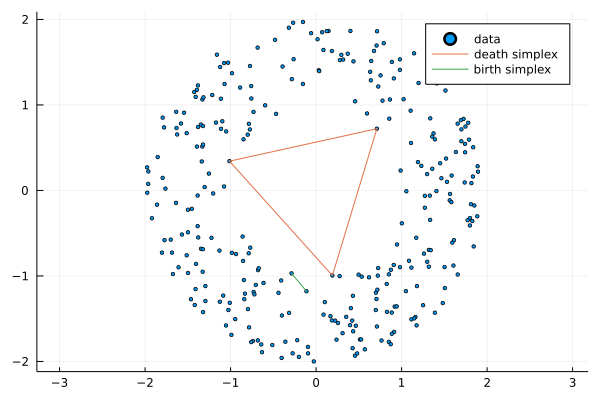

In [9]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(death_sx, data; label="death simplex")
plot!(birth_simplex(diagram[2][end]), data; label="birth simplex")

## Representative Cocycles
By setting reps=true ripserer will compute the cocycles

In [10]:
diagram_cocycles = ripserer(data; reps=true, modulus=11, dim_max=1)
most_persistent_co = diagram_cocycles[2][end]

[0.273, 1.8) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 2271-element Chain{Mod{11},Simplex{1, Float64, Int64}}

Here we can isolate the cocycle from the largest barcode

In [11]:
cocycle = representative(most_persistent_co)

2271-element Chain{Mod{11},Simplex{1, Float64, Int64}}:
 +Simplex{1}((252, 102), 0.2725470423087082) => 1 mod 11
 +Simplex{1}((102, 7), 0.32139946381785617) => 10 mod 11
 +Simplex{1}((221, 102), 0.32437310473615677) => 1 mod 11
 +Simplex{1}((225, 102), 0.3277375402660328) => 1 mod 11
 +Simplex{1}((268, 6), 0.34430149360109863) => 1 mod 11
 +Simplex{1}((78, 6), 0.36804323766975255) => 1 mod 11
 +Simplex{1}((175, 6), 0.3689761602613185) => 1 mod 11
 +Simplex{1}((163, 102), 0.40318633354372246) => 1 mod 11
 +Simplex{1}((277, 221), 0.4034665545821644) => 10 mod 11
 +Simplex{1}((268, 147), 0.41728225558199866) => 1 mod 11
 +Simplex{1}((277, 268), 0.41921420190686165) => 10 mod 11
 +Simplex{1}((277, 177), 0.42916123243904136) => 10 mod 11
 +Simplex{1}((268, 46), 0.43525713021987433) => 1 mod 11
 ⋮
 +Simplex{1}((177, 18), 1.795302272080803) => 1 mod 11
 +Simplex{1}((276, 255), 1.7956281149478683) => 1 mod 11
 +Simplex{1}((204, 156), 1.7960187606724085) => 1 mod 11
 +Simplex{1}((93, 59), 1.796

And we can now plot this cocycle

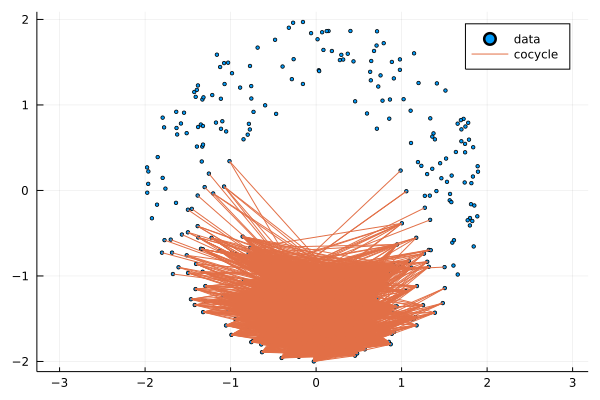

In [12]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(cocycle, data; label="cocycle")

## Representative Cycles
Similar to cocycles ripserer allows us to compute the cycles. To do this we must set the algorithm to the involuted algorithms with `alg=:involuted`

In [13]:
diagram_cycles = ripserer(data; alg=:involuted, dim_max=1)
most_persistent_ho = diagram_cycles[2][end]

[0.273, 1.8) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 80-element Chain{Mod{2},Simplex{1, Float64, Int64}}

Again we will isolate the most persistent hole and plot it

In [14]:
representative(diagram_cycles[2][end])

80-element Chain{Mod{2},Simplex{1, Float64, Int64}}:
 +Simplex{1}((252, 102), 0.2725470423087082) => 1 mod 2
 +Simplex{1}((284, 95), 0.2694298795447664) => 1 mod 2
 +Simplex{1}((160, 113), 0.2675482905134456) => 1 mod 2
 +Simplex{1}((294, 151), 0.2673484445968423) => 1 mod 2
 +Simplex{1}((280, 189), 0.2665491936645873) => 1 mod 2
 +Simplex{1}((240, 228), 0.26478366896988736) => 1 mod 2
 +Simplex{1}((256, 217), 0.26451412185325834) => 1 mod 2
 +Simplex{1}((147, 145), 0.2640414357307517) => 1 mod 2
 +Simplex{1}((290, 230), 0.26371906361468317) => 1 mod 2
 +Simplex{1}((202, 48), 0.259717003874935) => 1 mod 2
 +Simplex{1}((278, 259), 0.258933385652125) => 1 mod 2
 +Simplex{1}((214, 152), 0.25631178925022347) => 1 mod 2
 +Simplex{1}((295, 73), 0.25343951705474965) => 1 mod 2
 ⋮
 +Simplex{1}((104, 48), 0.08850042957364014) => 1 mod 2
 +Simplex{1}((292, 270), 0.07663957178413464) => 1 mod 2
 +Simplex{1}((148, 42), 0.07634791934631956) => 1 mod 2
 +Simplex{1}((284, 132), 0.06987338066214484) =

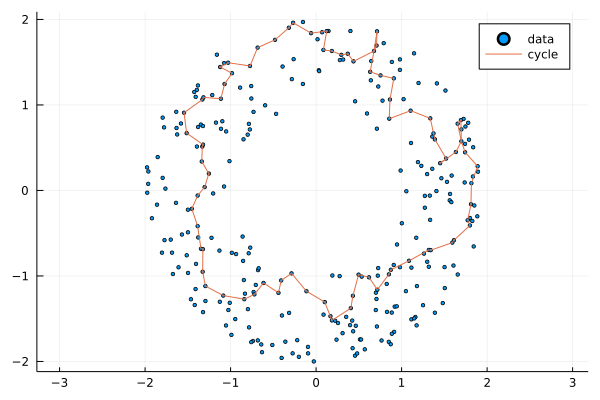

In [15]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho, data; label="cycle")

### Doing more with cycles
Ripserer allows us to use information from the cocycles to reconstruct the represenative cycle to be smaller. However this can only be done in two dimensional space.

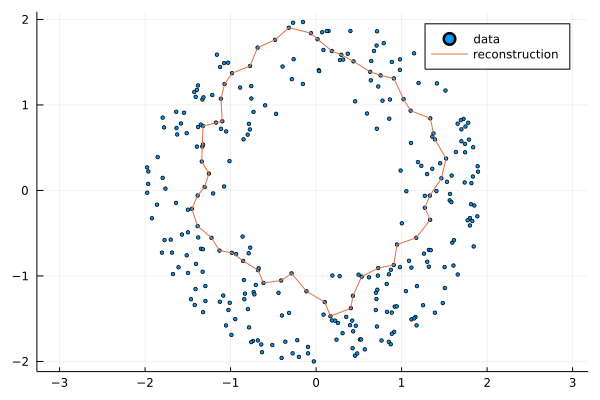

In [16]:
filtration = diagram_cocycles[2].filtration
reconstructed_at_birth = reconstruct_cycle(filtration, most_persistent_co)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(reconstructed_at_birth, data; label="reconstruction")

In [17]:
We can make representative even smaller

LoadError: syntax: extra token "can" after end of expression

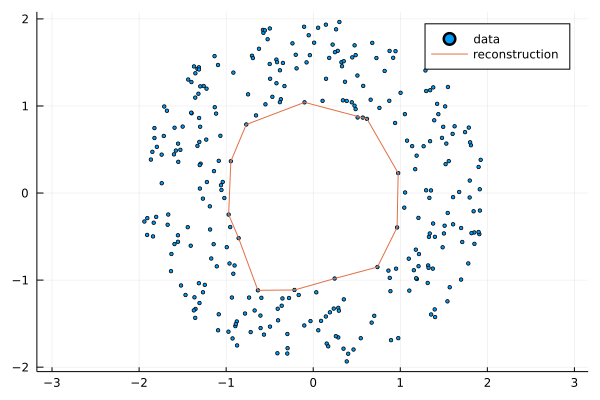

In [20]:
midpoint = (death(most_persistent_co) - birth(most_persistent_co)) / 2
reconstructed_at_midpoint = reconstruct_cycle(filtration, most_persistent_co, midpoint)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(reconstructed_at_midpoint, data; label="reconstruction")

However at a point we start to loose important information about the hole

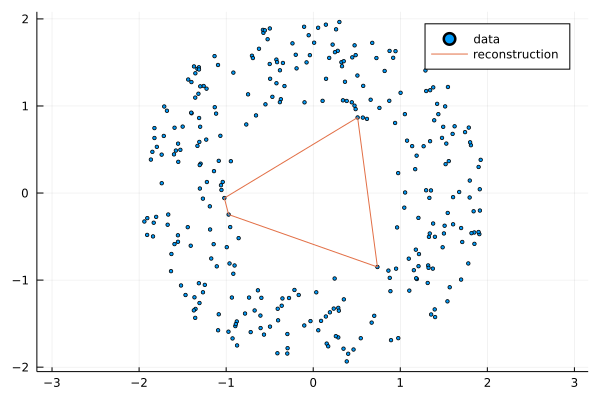

In [21]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, death(most_persistent_co) - 0.01),
    data;
    label="reconstruction",
)

## Three Dimesnional Euclidean Space
Now we will create a 300 point cloud from a sphere

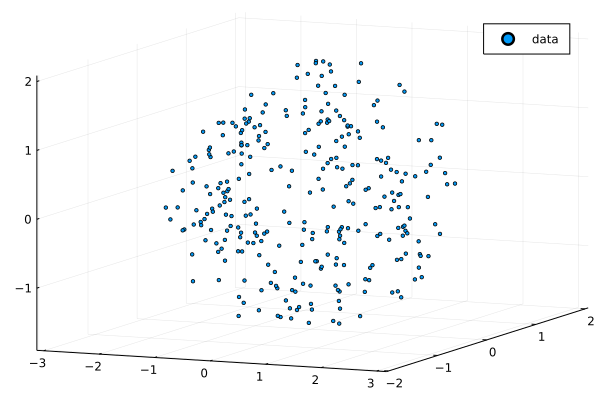

In [3]:
data = annulus3d(300)
scatter(data; label="data", markersize=2, aspect_ratio=1)

We can again compute the barcodes, but we must set `dim_max=2` to tell ripserer to compute homology classes $H_0$, $H_1$, and $H_2$

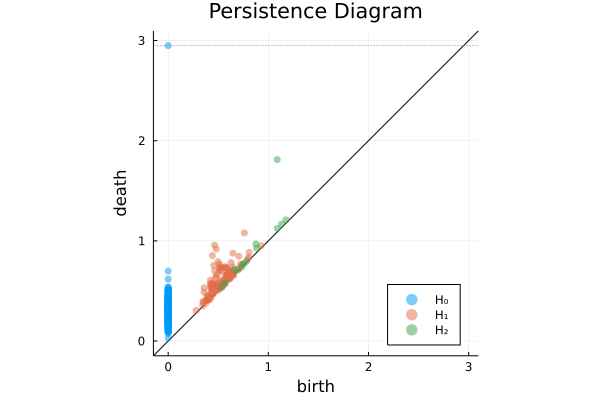

In [4]:
diagram = ripserer(data, modulus=11, dim_max=2)
plot(diagram)

Again we can isolate the most pronounched void and gain some useful information on it

In [5]:
most_persistent = diagram[3][end]

[1.09, 1.81) with:
 birth_simplex: Simplex{2, Float64, Int64}
 death_simplex: Simplex{3, Float64, Int64}

And we can plot its cycle representatives and cocycle representatives
### Coycle Representative

In [6]:
diagram_cocycles = ripserer(data; reps=true, modulus=11, dim_max=2)
most_persistent_co = diagram_cocycles[3][end]

[1.09, 1.81) with:
 birth_simplex: Simplex{2, Float64, Int64}
 death_simplex: Simplex{3, Float64, Int64}
 representative: 2931-element Chain{Mod{11},Simplex{2, Float64, Int64}}

In [7]:
cocycle = representative(most_persistent_co)

2931-element Chain{Mod{11},Simplex{2, Float64, Int64}}:
 +Simplex{2}((232, 193, 83), 1.0884266572847752) => 10 mod 11
 +Simplex{2}((232, 159, 83), 1.0884266572847752) => 10 mod 11
 +Simplex{2}((269, 198, 158), 1.0887875111272405) => 1 mod 11
 +Simplex{2}((269, 193, 158), 1.0887875111272405) => 1 mod 11
 +Simplex{2}((269, 159, 158), 1.0887875111272405) => 1 mod 11
 +Simplex{2}((269, 158, 70), 1.0887875111272405) => 10 mod 11
 +Simplex{2}((232, 192, 83), 1.0937822301818014) => 10 mod 11
 +Simplex{2}((269, 158, 121), 1.0941213106356498) => 10 mod 11
 +Simplex{2}((232, 83, 70), 1.118282100071179) => 1 mod 11
 +Simplex{2}((232, 228, 159), 1.1245294977282854) => 1 mod 11
 +Simplex{2}((228, 159, 158), 1.1245294977282854) => 1 mod 11
 +Simplex{2}((232, 209, 159), 1.1346244478144751) => 1 mod 11
 +Simplex{2}((228, 171, 159), 1.1353592092616538) => 10 mod 11
 ⋮
 +Simplex{2}((209, 82, 60), 1.8109546175977944) => 10 mod 11
 +Simplex{2}((158, 82, 60), 1.8109546175977944) => 10 mod 11
 +Simplex{2}((

Here we can plot the most persistence cocycle. Note that although the plot apears to be of 1-simplices it is fact a plot of triangles, or the 2-simplices making up the cocycle

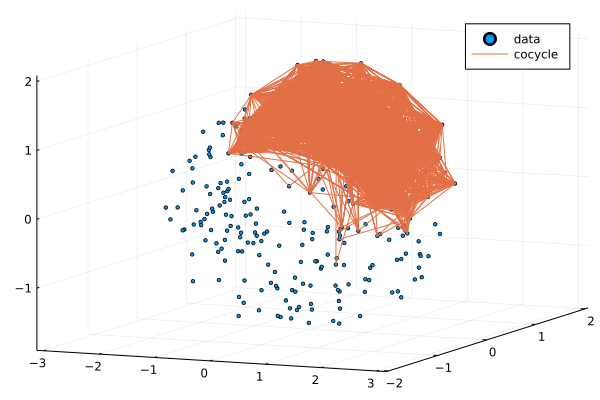

In [12]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent_co, data; label="cocycle")

### Cycle represenative

In [10]:
diagram_cycles = ripserer(data; alg=:involuted, dim_max=2)
most_persistent_ho = diagram_cycles[3][end]

[1.09, 1.81) with:
 birth_simplex: Simplex{2, Float64, Int64}
 death_simplex: Simplex{3, Float64, Int64}
 representative: 200-element Chain{Mod{2},Simplex{2, Float64, Int64}}

Here we can plot the most persistence cycle. Note that although the plot apears to be of 1-simplices it is fact a plot of triangles, or the 2-simplices making up the cycle

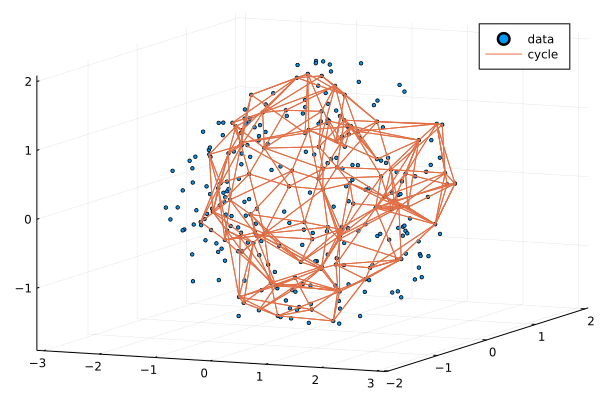

In [11]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho, data; label="cycle")